# CAN I GET A LITTLE CREDIT? 
### An Exploration of Credit Worthiness
### Using Classification to Predict Serious Repayment Delinquency

-----

**Personal Project & Final Report Created By:** Rachel Robbins-Mayhill | April 27, 2022

---

<img src='loan_risk.png' width="1500" height="500" align="center"/>

In [1]:
# Import for data manipulation
import pandas as pd
import numpy as np

# Import for data viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Import for Hypothesis Testing
import scipy.stats as stats

# Import for acquisition
import env
import os
import wrangle

# Add for setting to see all rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

## PROJECT DESCRIPTION

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the methods banks use to determine whether or not a loan should be granted. This project aims to improve upon the state of the art in credit scoring, by predicting the probability that somebody will experience serious delinquency in the next two years. For the purpose of this project 'Serious Delinquency' is defined as being 90 days or more past due on payment. 

I am interested in this project because identifying at-risk borrower populations helps to protect the consumer, the business, the market, and society as a whole. Identifying borrowers who are at risk of default helps to prevent the consumer from entering into a situation that could be harmful to their long-term financial stability. It helps the banking institution prevent significant and costly losses which could impact business sustainability and limit the potential to help others. Lastly, as we saw with the housing crisis of 2008, accurately identifying at-risk loan applicants can prevent the destabilizing of the market which can have far-reaching consequences for society as a whole.

## EXECUTIVE SUMMARY

## PROJECT GOAL

The goal of this project is to build a model that can used to help borrowers and banking institutions make the best financial decisions.

## INITIAL QUESTIONS:
Data-Focused Questions

- Are applicants in certain age groups more likely to be seriously delinquent?
- Are applicants with lower monthly income more likely to be seriously delinquent?
- Are applicants with higher debt to income ratio more likely to be seriously delinquent?
- Are applicants with higher revolving unsecured line utilization more likely to be seriously delinquent?

=================================================================================================================================================================================================================================

## I. ACQUIRE

The data for this report was acquired by accessing the 'client_data.csv.'  The .csv provides historical data on 150,000 borrowers and it can be found in the 'Personal Project' repository on GitHub. The data acquisition for this project requires the .csv file of the data to be saved locally.  Once the .csv file has been saved locally, the data can be accessed using the get_client_data function saved within the wrangle.py file inside the 'Personal Project' repository on GitHub. This function acquires data from a local .csv file and returns a dataframe using pandas. The function informs the user of completion.

In [2]:
df = wrangle.get_client_data()

Reading from .csv file.
Data acquisition complete.


In [3]:
df.shape

(150000, 12)

## The Original DataFrame Size: 150,000 rows, or observations, and 12 columns.

=================================================================================================================================================================================================================================

## II. PREPARE

After data acquisition, the table was analyzed and cleaned to facilitate functional exploration and clarify variable confusion. The preparation of this data can be replicated using the wrangle_client function saved within the wrangle.py file inside the 'personal project' repository on GitHub. The function takes in the original client_data dataframe and returns it with the changes noted below.

**Steps Taken to Clean & Prepare Data:**

- Delete "Unnamed' index
- Rename columns for understanding, while making lowercase
- Drop missing values (29_731 in monthly_income and 3_924 in quantity_dep)
- Create categorical columns for binning age and dependents

---

### Results of Data Preparation

In [4]:
# apply the data preparation observations and tasks to clean the data using the wrangle_client function found in the wrangle.py
df = wrangle.wrangle_client(df)
df.head()

,serious_delinquency,revolv_unsec_utilization,age,quantity_30_59_pd,debt_to_income_ratio,monthly_income,quantity_loans_and_lines,quantity_90_days_pd,quantity_real_estate_loans,quantity_60_89_days_pd,quantity_dependents,age_bins,quantity_dependents_bins
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,age_40-49,1_2_dep
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,age_40-49,1_2_dep
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,age_30-39,0_dep
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,age_30-39,0_dep
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,age_40-49,0_dep


In [5]:
# obtain the number of rows and columns for the dataframe. 
df.shape

(120269, 13)

## Prepared DataFrame Size: 120,269 rows, 11 columns

----

### PREPARE - SPLIT

After preparing the data, it was split into 3 samples; train, validate, and test using:

- Random State: 123
- Test = 20% of the original dataset
- The remaining 80% of the dataset is divided between valiidate and train
    - Validate (.30*.80) = 24% of the original dataset
    - Train (.70*.80) = 56% of the original dataset
    
The split of this data can be replicated using the split_data function saved within the wrangle.py file inside the 'personal project' repository on GitHub.




In [6]:
# split the data into train, validate, and test using the split_data function found in the wrangle.py
train, validate, test = wrangle.split_data(df)

train -> (67350, 13)
validate -> (28865, 13)
test -> (24054, 13)


===================================================================================================================================

## III. EXPLORE

---

### EXPLORE QUESTIONS

- Are applicants in certain age groups more likely to be seriously delinquent?
- Are applicants with lower monthly income more likely to be seriously delinquent?
- Are applicants with higher debt to income ratio more likely to be seriously delinquent?
- Are applicants with higher revolving unsecured line utilization more likely to be seriously delinquent?

---

## QUESTION: AGE
- Are applicants in certain age groups more likely to be seriously delinquent?

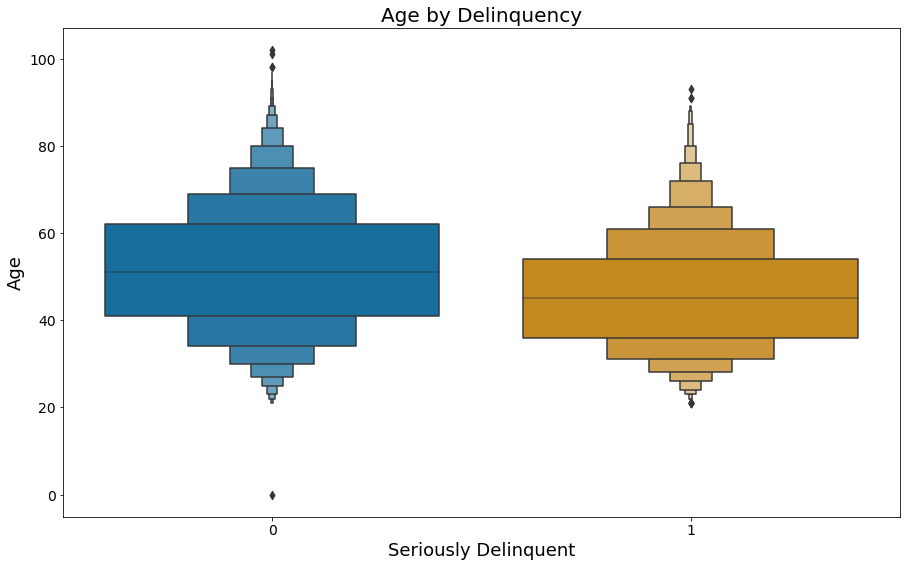

In [7]:
# Create visualization with designated size, title, x label, y label, and font size, as well as font-size and labels for x and y ticks. 
plt.figure(figsize=(15,9))
labels = ['No Serious Delinquency', 'Serious Delinquency']
sns.boxenplot(x='serious_delinquency',y='age',data=train, palette='colorblind')
plt.title("Age by Delinquency", fontsize=20)
plt.xlabel('Seriously Delinquent', fontsize=18) 
plt.xticks(fontsize=14)
plt.ylabel('Age', fontsize=18) 
plt.yticks(fontsize=14)
plt.show()

Observation: Those who are seriously delinquent tend to be younger than those who are not. 

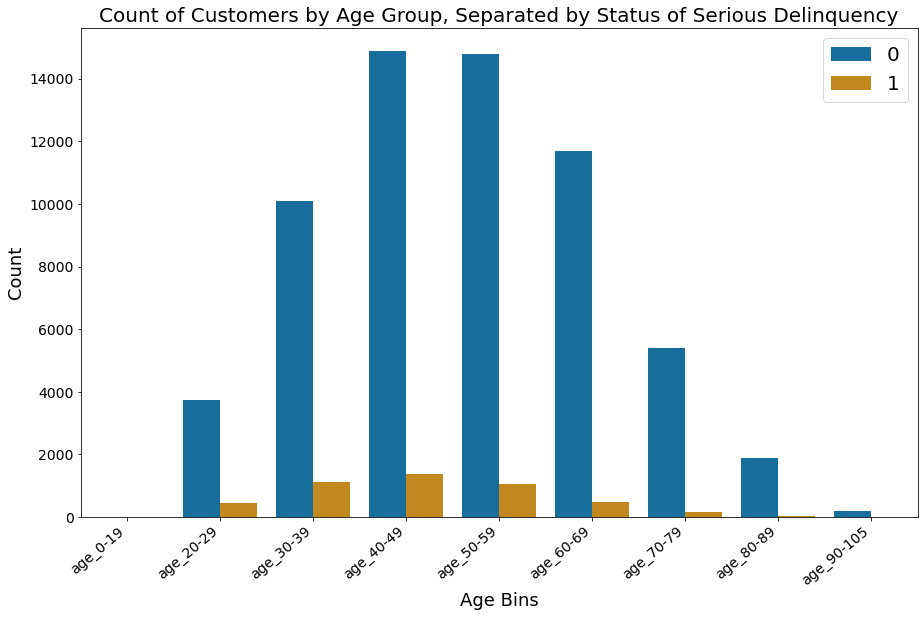

In [8]:
# Create visualization with designated size, title, x label, y label, and font size. 
plt.figure(figsize=(15,9))
sns.countplot(x='age_bins', hue='serious_delinquency', data=train, palette='colorblind')
plt.title("Count of Customers by Age Group, Separated by Status of Serious Delinquency", fontsize=20)
plt.xlabel('Age Bins', fontsize=18) 
plt.xticks(fontsize=14, rotation= 40, ha='right')
plt.ylabel('Count', fontsize=18) 
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()

Observation: It appears that serious delinquency occurs more frequently between 30 and 60 years old. Statistical testing will be conducted to verify statistical relevance of observations.

In [18]:
#Total dataset breakdown
# train.age_bins.value_counts(normalize=True)
train[['age_bins', 'serious_delinquency']].value_counts(normalize=True).sort_values(ascending=False)

age_bins    serious_delinquency
age_40-49   0                      0.220850
age_50-59   0                      0.219573
age_60-69   0                      0.173559
age_30-39   0                      0.149624
age_70-79   0                      0.080268
age_20-29   0                      0.055428
age_80-89   0                      0.027914
age_40-49   1                      0.020327
age_30-39   1                      0.016704
age_50-59   1                      0.015576
age_60-69   1                      0.007261
age_20-29   1                      0.006904
age_90-105  0                      0.003088
age_70-79   1                      0.002301
age_80-89   1                      0.000579
age_90-105  1                      0.000045
dtype: float64

In [14]:
for i in age_bins:
    ratio = sum(np.logical_and(train[i] == 1, train[serious_delinquency] == 1)) / sum(train[i] == 1) * 100
ratio

KeyError: 'age_40-49'

In [ ]:
#train.groupby("age_bins")["serious_delinquency"].sum() / .len()

# train['serious_delinquency_percent'] = train.groupby('age_bins').apply(lambda s: s.serious_delinquency.sum()/s.age_bins).values


### Statistical Testing
Chi^2 Statistical Testing will be conducted because the variables age bins and serious delinquency are both categorical/discrete.

Hypothesis:
- H$_{0}$: Serious Delinquency is independent of age. 
- H$_{a}$: Serious Delinquency is NOT independent of age.

In [ ]:
# Conduct chi^2 statistical test
observed = pd.crosstab(train['age_bins'], train.serious_delinquency)

# Set alpha
alpha= 0.05
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < alpha:
    print("We reject the hypothesis, our data is statistically relevant.")
else:
    print("We fail to reject the null hypothesis.")

## ANSWER: AGE
- Yes, applicants in certain age groups are more likely to be seriously delinquent, particulary those between the ages of 30 and 60. 

---

## QUESTION: Monthly Income
- Are applicants with lower monthly income more likely to be seriously delinquent?

In [ ]:
# Create visualization with designated size, title, x label, y label, and font size, as well as font-size and labels for x and y ticks. 
plt.figure(figsize=(15,9))
sns.swarmplot(x= 'serious_delinquency', y='monthly_income', data= train)

In [ ]:
'''
plt.title("Age by Delinquency", fontsize=20)
plt.xlabel('Seriously Delinquent', fontsize=18) 
plt.xticks(fontsize=14)
plt.ylabel('Age', fontsize=18) 
plt.yticks(fontsize=14)
plt.show()
'''

## QUESTION: Revolving Unsecured Line Utilization
- Are applicants with higher revolving unsecured line utilization more likely to be seriously delinquent?

## QUESTION
- Are applicants with previous delinquency between 30 and 89 days more likely to be seriously delinquent?

### EXPLORATION SUMMARY

===================================================================================================================================

## IV. MODEL

### MODEL - SCALE

===================================================================================================================================

## V. CONCLUSION

### RECOMMENDATIONS

### NEXT STEPS